In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

df = pd.read_csv('2024 Ballon Dor Nominees League Stats.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 237 entries, Unnamed: 0 to Aerial Duels-Won%
dtypes: float64(102), int64(130), object(5)
memory usage: 55.7+ KB


In [295]:
df.isnull().sum()

Unnamed: 0                0
league                    0
season                    0
team                      0
player                    0
                         ..
Performance_misc-OG       0
Performance_misc-Recov    0
Aerial Duels-Won          0
Aerial Duels-Lost         0
Aerial Duels-Won%         0
Length: 237, dtype: int64

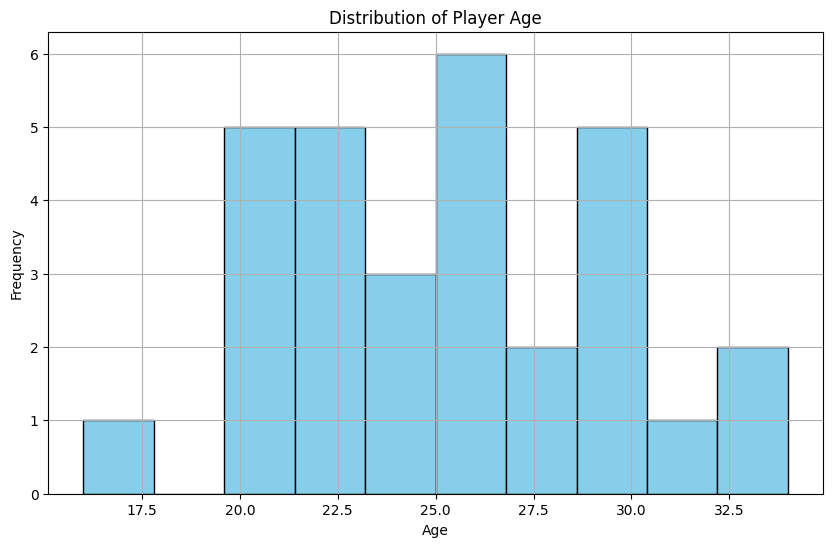

In [296]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

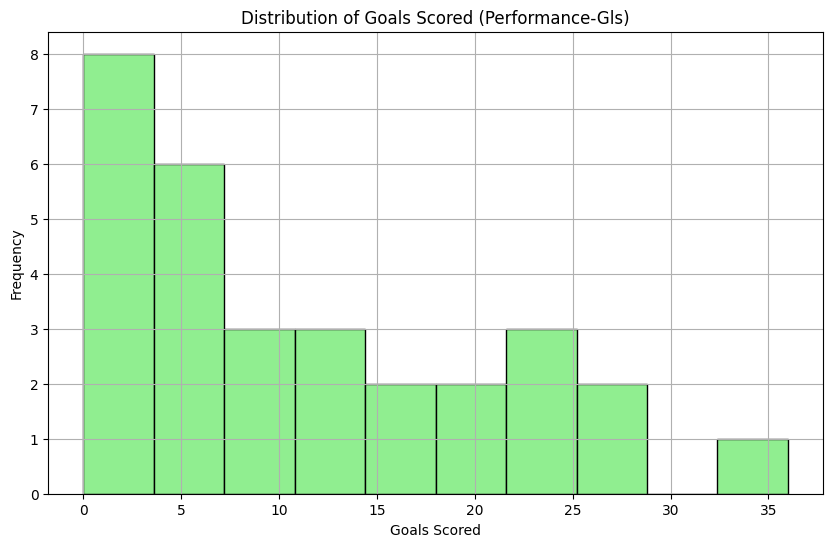

In [297]:
plt.figure(figsize=(10, 6))
plt.hist(df['Performance-Gls'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Goals Scored (Performance-Gls)')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [298]:
# Filter only the numeric columns for filling missing values
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values only in numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Select the relevant numerical columns as features
features = df[numeric_columns].drop(columns=["Unnamed: 0", "age", "born"])

# Select 'Goals-GA' as the target column
target = df['Performance-Gls']

# Convert features and target to NumPy arrays
X_train = np.array(features)
y_train = np.array(target)

In [299]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [300]:
# Network model
model = Sequential()

# Add the Input layer explicitly
model.add(Input(shape=(X_train_scaled.shape[1],)))

# Add the Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [301]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.5, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Final Loss: {loss}, Final MAE: {mae}")

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step - loss: 243.3380 - mae: 12.1891 - val_loss: 166.3530 - val_mae: 9.3725
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 232.0001 - mae: 11.8221 - val_loss: 160.8949 - val_mae: 9.1481
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 221.7045 - mae: 11.4721 - val_loss: 155.1105 - val_mae: 8.9737
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 211.3824 - mae: 11.1206 - val_loss: 149.5768 - val_mae: 8.7995
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 201.3812 - mae: 10.7758 - val_loss: 144.0549 - val_mae: 8.6219
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 191.1362 - mae: 10.4165 - val_loss: 138.2122 - val_mae: 8.4435
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 180.8037 - mae: 10.0431 - val_loss: 132.2019 - val_mae: 8.2576
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 170.3038 - mae: 9.6809 - val_loss: 125.9223 - val_mae: 8.0585
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━

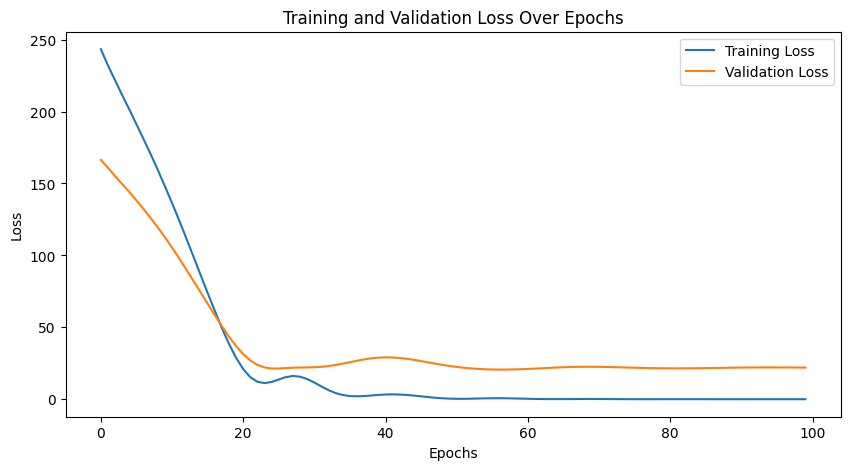

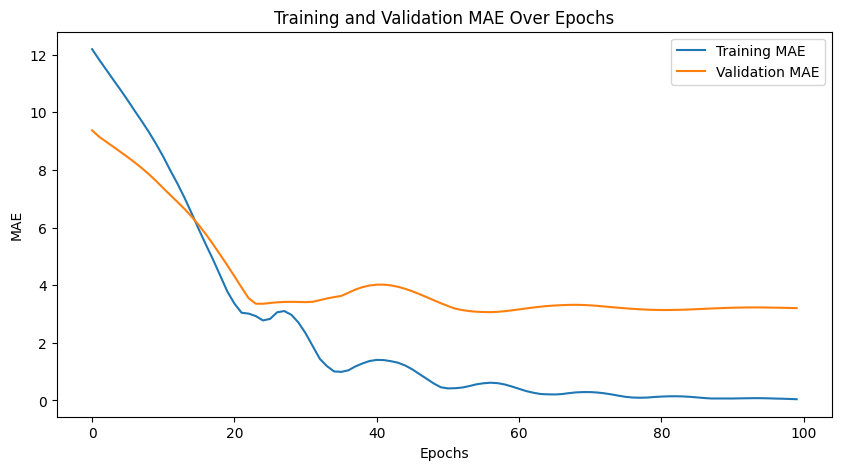

In [302]:
# Plot loss over epochs
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot MAE over epochs
plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()